#### Analyze the mapping quality of E-MTAB-9489 (Holloway, 2021, human fetal samples)
- **Developed by:** Anna Maguza
- **Affilation:** Faculty of Medicine, Würzburg University
- **Created date:** 25th October 2024
- **Last modified dte:** 29th October 2024

This notebook is created to check the quality of the mapping from E-MTAB-9489 study. In this notebook we are visualizing `StarSolo` mapping metrics. 

+ Import packages

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

+ Some samples had UMI length 12, and some ten, therefore the mapping script tried both options, and ended up in generation of two Log.progress.out files but one is empty. The following function indents to choose the correct file by analyzing file size.

In [16]:
def get_log_file(sample_dir):
    umi10_log = os.path.join(sample_dir, "UMI10_Log.progress.out")
    umi12_log = os.path.join(sample_dir, "UMI12_Log.progress.out")
    
    if os.path.exists(umi12_log) and os.path.getsize(umi12_log) > 300:
        return umi12_log
    elif os.path.exists(umi10_log) and os.path.getsize(umi10_log) > 300:
        return umi10_log
    else:
        return None

+ Transform Log.progress.out file to dataframe

In [17]:
def process_sample(sample_dir):
    log_file = get_log_file(sample_dir)
    if log_file is None:
        print(f"Warning: No valid mapping log found for sample {os.path.basename(sample_dir)}")
        return None
    
    try:
        # Read the file, skipping the header rows
        df = pd.read_csv(log_file, sep='\s+', skiprows=2,
                        names=['Month', 'Day', 'Time', 'Speed', 'Number', 'Length', 
                              'Mapped_unique', 'Mapped_length', 'Mapped_MMrate', 
                              'Mapped_multi', 'Unmapped_multi+', 'Unmapped_MM', 
                              'Unmapped_short', 'Unmapped_other'])
        
        # Convert percentage columns to float
        percentage_columns = ['Mapped_unique', 'Mapped_MMrate', 'Mapped_multi',
                            'Unmapped_multi+', 'Unmapped_MM', 'Unmapped_short', 
                            'Unmapped_other']
        
        for col in percentage_columns:
            df[col] = df[col].str.rstrip('%').astype('float') / 100.0
        
        # Convert numeric columns
        df['Mapped_length'] = pd.to_numeric(df['Mapped_length'])
        
        # Calculate means for the metrics of interest
        metrics_of_interest = ['Mapped_unique', 'Mapped_length', 'Mapped_MMrate',
                             'Mapped_multi', 'Unmapped_multi+', 'Unmapped_MM',
                             'Unmapped_short', 'Unmapped_other']
        
        mean_values = df[metrics_of_interest].mean()
        return mean_values
        
    except Exception as e:
        print(f"Error processing {log_file}: {str(e)}")
        return None

In [18]:
BASE_DIR = "raw_data/Holloway_2021/remapped_fetal_E-MTAB-9489"

In [19]:
sample_dirs = glob.glob(os.path.join(BASE_DIR, "*"))
results = {}
for sample_dir in sample_dirs:
    sample_name = os.path.basename(sample_dir)
    print(f"Processing sample: {sample_name}")
        
    mean_values = process_sample(sample_dir)
    if mean_values is not None:
        results[sample_name] = mean_values

Processing sample: HT228-fetal-duodenum_S2_L006
Processing sample: 6-Int-Fresh-Sorted_S6_L001
Processing sample: HT-274_fetal_duo_d72_S44_L002
Processing sample: HT-172-d127-Duo-2_S2_L006
Processing sample: HT-274_fetal_duo_d72_S41_L003
Processing sample: HT-243_small-intestine_S34_L001
Processing sample: HT-172-d127-Duo-1_S1_L007
Processing sample: HT-274_fetal_duo_d72_S41_L004
Processing sample: HT-274_fetal_duo_d72_S43_L003
Processing sample: HT228-fetal-duodenum_S2_L008
Processing sample: HT228-fetal-duodenum_S2_L005
Processing sample: HT228-fetal-duodenum_S2_L001
Processing sample: 5-Int-Fresh-Unsorted_S5_L002
Processing sample: 6-Int-Fresh-Sorted_S6_L003
Processing sample: HT-274_fetal_duo_d72_S42_L001
Processing sample: HT-236_day132_duo_S25_L003
Processing sample: HT-234-Duo_S19_L002
Processing sample: HT-274_fetal_duo_d72_S44_L004
Processing sample: 5-Int-Fresh-Unsorted_S5_L004
Processing sample: 5-Int-Fresh-Unsorted_S5_L003
Processing sample: HT-274_fetal_duo_d72_S43_L004
Pro

In [20]:
results_df = pd.DataFrame(results).T

In [21]:
results_df

,Mapped_unique,Mapped_length,Mapped_MMrate,Mapped_multi,Unmapped_multi+,Unmapped_MM,Unmapped_short,Unmapped_other
HT228-fetal-duodenum_S2_L006,0.792778,111.900000,0.006889,0.120889,0.002000,0.0,0.046111,0.039000
6-Int-Fresh-Sorted_S6_L001,0.812400,108.300000,0.006000,0.122000,0.003000,0.0,0.048600,0.014000
HT-274_fetal_duo_d72_S44_L002,0.848000,112.300000,0.003000,0.119500,0.002000,0.0,0.020000,0.010000
HT-172-d127-Duo-2_S2_L006,0.845095,107.400000,0.005000,0.117857,0.002000,0.0,0.030286,0.005000
HT-274_fetal_duo_d72_S41_L003,0.846000,112.200000,0.003000,0.120000,0.002000,0.0,0.023000,0.010000
HT-243_small-intestine_S34_L001,0.799000,113.100000,0.002000,0.143000,0.001000,0.0,0.045000,0.012000
HT-172-d127-Duo-1_S1_L007,0.845400,108.105000,0.005500,0.119100,0.002000,0.0,0.029900,0.003700
HT-274_fetal_duo_d72_S41_L004,0.846000,112.200000,0.003000,0.120000,0.002000,0.0,0.023000,0.011000
HT-274_fetal_duo_d72_S43_L003,0.849000,112.200000,0.002000,0.119000,0.002000,0.0,0.019000,0.010500
HT228-fetal-duodenum_S2_L008,0.792333,111.977778,0.006778,0.120667,0.002000,0.0,0.048889,0.036556


In [22]:
output_file = os.path.join(BASE_DIR, "mapping_metrics_summary.csv")
results_df.to_csv(output_file)

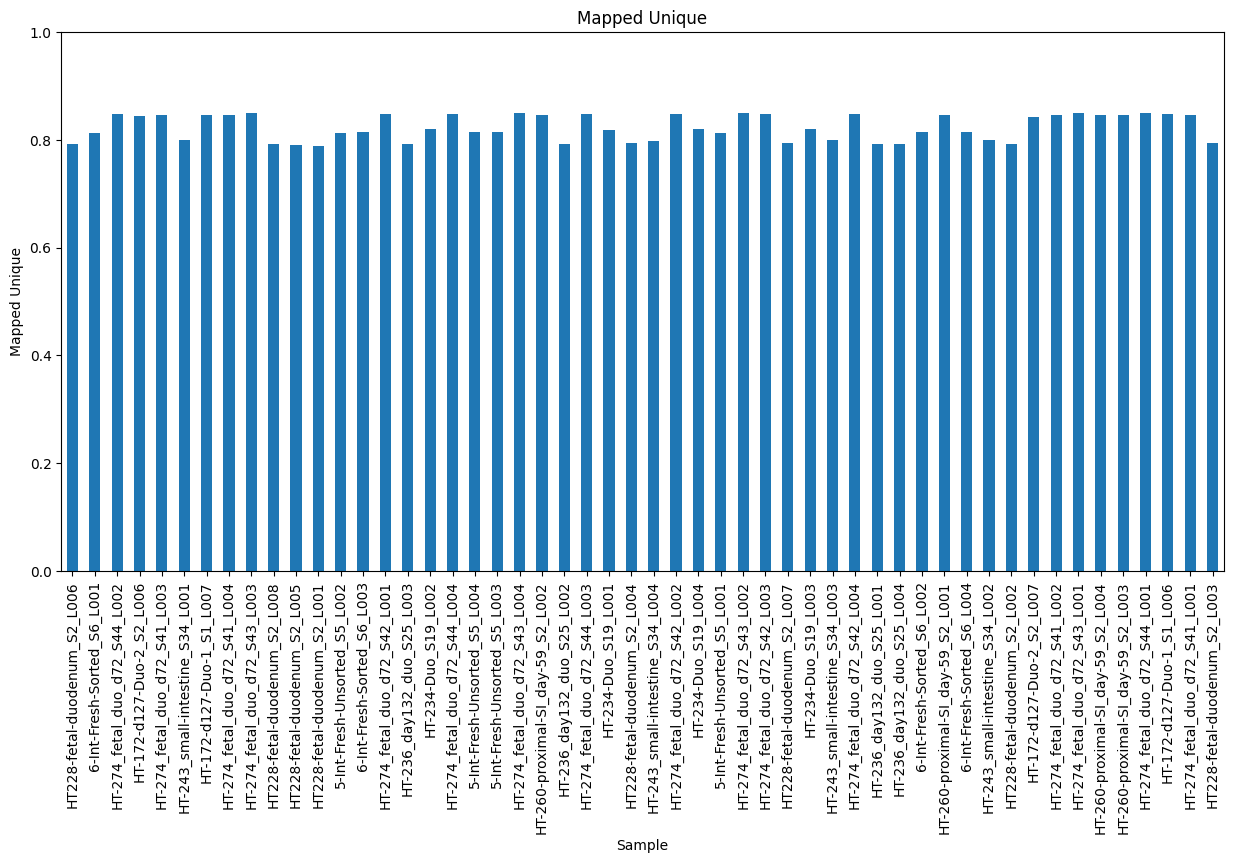

In [24]:
results_df['Mapped_unique'].plot(kind='bar', figsize=(15, 7), title='Mapped Unique')
plt.xlabel('Sample')
plt.ylabel('Mapped Unique')
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.show()